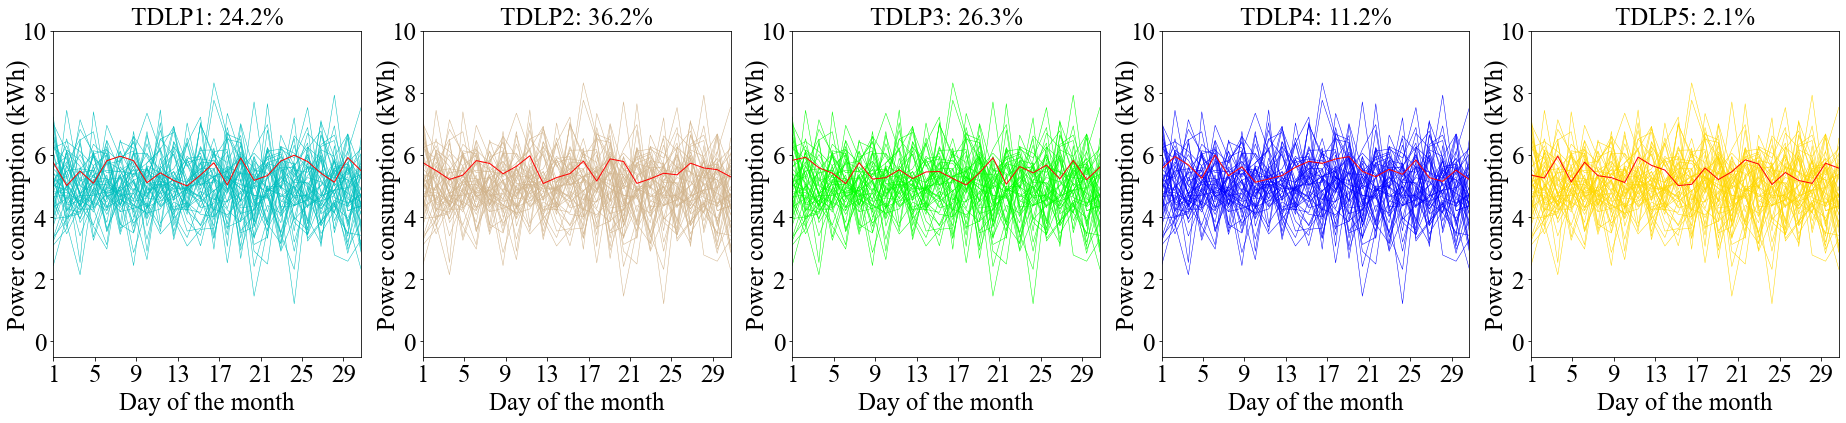

In [55]:
# -*- coding: utf-8 -*-
"""
画LP曲线图
@author: lxh
"""

import numpy as np
import matplotlib.pyplot as plt


def draw_LPs(x, LPs, LP_type, ymax=None, pure=False, cluster_center=None, lt_title=None,
             title=None, filepath=None, formats=None, color='#C8C8FF', c_color='#8B0000'):
    r'''
    x: 曲线维度，为24,48,96等
    LPs: LP数组或ndarray
    cluster_center: 聚类中心曲线，对于KMeans聚类来说好像就是平均的
    pure: 为False画彩色的
    默认会画一条平均值曲线
    '''
    assert LP_type == 'DLP' or LP_type == 'WLP' or LP_type == 'MLP' or LP_type == 'YLP'
    xlabel_dict = {'DLP': 'Hour of the day', 'WLP': 'Day of the week', 'MLP': 'Day of the month', 'YLP': 'Month of the year'}
    LP_width_dict = {'DLP': 0.5, 'WLP': 0.5, 'MLP': 0.5, 'YLP': 0.3}
    C_width_dict = {'DLP': 4, 'WLP': 1.5, 'MLP': 1, 'YLP': 0.4}

    plt.rcParams['font.family'] = ['Times New Roman']
    label_font = {
        # 'weight': 'bold',
        'size': 25,
        'family': 'Times New Roman'
    }
    LPs = np.array(LPs)
    if ymax == None:
        ymax = int(LPs.max()) + 1
    
    x = np.array(x)
    assert len(x) == LPs.shape[1]

    for LP in LPs:
        if pure:
            plt.plot(x, LP, color=color, linewidth=LP_width_dict[LP_type])
        else:
            plt.plot(x, LP, linewidth=LP_width_dict[LP_type])
    ax = fig.gca()
    if pure:
        if np.any(cluster_center) != None:
            plt.plot(x, cluster_center, color=c_color,
                     linewidth=C_width_dict[LP_type], label='Cluster Center')
        else:
            # 用平均值代替聚类中心
            plt.plot(x, LPs.mean(axis=0), color=c_color,
                     linewidth=C_width_dict[LP_type], label='Cluster Center')

    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')


    plt.xlabel(xlabel_dict[LP_type], fontdict=label_font)
    plt.ylabel('Power consumption (kWh)', fontdict=label_font, labelpad=-10)
    plt.tick_params(axis='x')
    plt.tick_params(axis='y')
    ymax = int(ymax)
    if ymax % 2 == 0:
        ymax += 2
    else:
        ymax += 1
    yticks_labels = [str(i) for i in range(0, ymax+1, 2)]
    plt.yticks(np.arange(0, ymax+1, 2),
               yticks_labels, fontsize=25)
    plt.xlim((0, len(x)-1))
    plt.ylim((-0.5, ymax))

    if LP_type == 'DLP':
        plt.xticks(np.arange(0, len(x), len(x)/6),
                   ['0','4','8','12','16','20'], fontsize=25)
    elif LP_type == 'WLP':
        xticks_labels = ['Sun', 'Tues', 'Thu', 'Sat']
        plt.xticks(np.arange(0, len(x), len(x)*2/7),
                   xticks_labels, fontsize=25)
    elif LP_type == 'MLP':
        xticks_labels = ['1', '5', '9', '13', '17', 
        '21', '25', '29']
        plt.xticks(np.arange(0, len(x), len(x)*4/31),
                   xticks_labels, fontsize=25)
    elif LP_type == 'YLP':
        plt.xticks(np.arange(0, len(x), len(x)*2/12),
                   ['Jan',  'Mar', 'May',  'Jul', 'Sept',  'Nov', ], fontsize=25)

    if title is not None:
        plt.title(title, fontdict=label_font)
    if lt_title is not None:
        plt.text(0.11, 0.93, lt_title, fontdict=dict(fontsize=20,
                                                     color='r', family='DejaVu Sans',
                                                     weight='bold'),
                 ha='center', va='center', transform=ax.transAxes)
    # if filepath is not None and formats is not None:
    #     for format in formats:
    #         plt.savefig(filepath+'.'+format, format=format)


if __name__ == '__main__':
    color_list = [('c', 'r'), ('tan', 'r'), ('lime', 'r'), ('b', 'r'),
                  ('gold', 'r'), ('limegreen', 'r'), ('darkblue', 'r'), ('yellowgreen', 'r')]
    LEN = 24
    x = np.arange(0, LEN)
    y = np.random.normal(size=(50, LEN)) + 5
    # draw_LPs(x, y, LP_type='DLP', pure=True,
    #          cluster_center=np.random.rand(LEN)+5, title='one color')
    fig = plt.figure(figsize=(32, 6))
    titles = ['TDLP1: 24.2%', 'TDLP2: 36.2%', 'TDLP3: 26.3%', 'TDLP4: 11.2%', 'TDLP5: 2.1%']
    for i in range(1,6):
        plt.subplot(1,5,i)
        draw_LPs(x, y, LP_type='MLP', pure=True,
                 cluster_center=np.random.rand(LEN)+5, title=titles[i-1], color=color_list[i-1][0], c_color=color_list[i-1][1])
    plt.show()


